In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import seaborn as sns; sns.set()
from sklearn.preprocessing import MinMaxScaler

from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

C:\Users\mja04\AppData\Local\Temp\ipykernel_10800\984135291.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:
cancer = pd.read_csv('C:/Users/mja04/OneDrive/Data Mining ll/Project 4 Breast Cancer/breast-cancer.csv')
display(cancer)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
X = cancer.drop('diagnosis', axis=1)  # Features
y_label = cancer['diagnosis']

mms = MinMaxScaler()
X_minmax = mms.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_minmax, y_label, train_size=0.7, stratify=y_label, random_state=0)

0.9532163742690059


[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

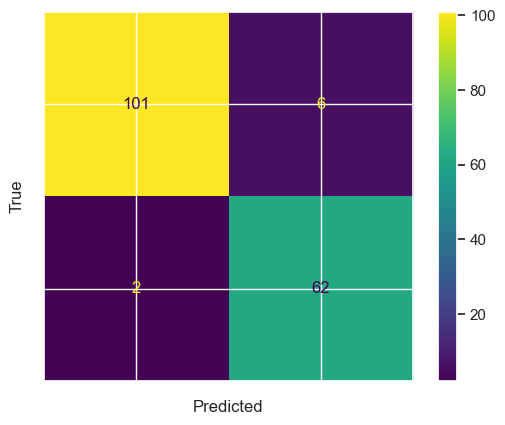

In [15]:
clf = RandomForestClassifier() #can use the defaults
clf.fit(X_train, y_train)
y_pred =clf.predict(X_test)

print(accuracy_score(y_test,y_pred))
cf_matrix = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=[])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

Accuracy: 0.9590643274853801
Cross-Validation Scores: [0.9625     0.9875     0.9625     0.92405063 0.98734177]
Mean CV Score: 0.9647784810126583


Text(0.5, 1.0, 'Confusion Matrix')

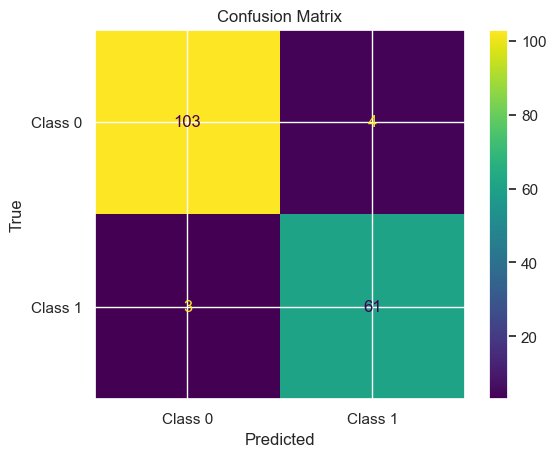

In [21]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

# Initialize AdaBoost classifier
clf = AdaBoostClassifier()
# Fit the classifier
clf.fit(X_train, y_train)
# Predictions on test set
y_pred = clf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Cross-validation scores
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Plot confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['B', 'M'])  
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')
cmd.ax_.set_title('Confusion Matrix')
